In [1]:
push!(LOAD_PATH,"C:/JMB/DINEOF.jl/src","."); using DINEOF
using PyPlot
using LinearAlgebra
using Arpack
using Random
using Statistics

In [2]:
?DINEOF_errormap

search: DINEOF_errormap



```
errormap=DINEOF_errormap(U,S,V,musquare,missingvalues)
```

# Analysis error variance based on OI interpretation of EOF base

# Input:

  * `U,S,V` decomposition
  * `musquare` : error variance on data (including inflation for correlated data).
  * `missingvalues` : array of indexes of the missing values

# Output:

  * `errormap` : array of error variance of reconstruction, same dimension as USV'


In [3]:
Random.seed!(123)

MersenneTwister(UInt32[0x0000007b], Random.DSFMT.DSFMT_state(Int32[1464307935, 1073116007, 222134151, 1073120226, -290652630, 1072956456, -580276323, 1073476387, 1332671753, 1073438661  …  138346874, 1073030449, 1049893279, 1073166535, -1999907543, 1597138926, -775229811, 32947490, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x0000000000000

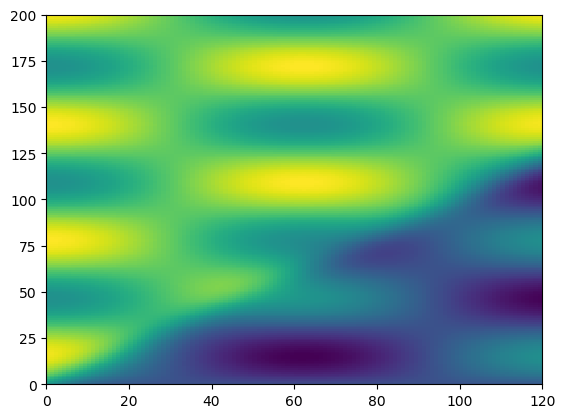

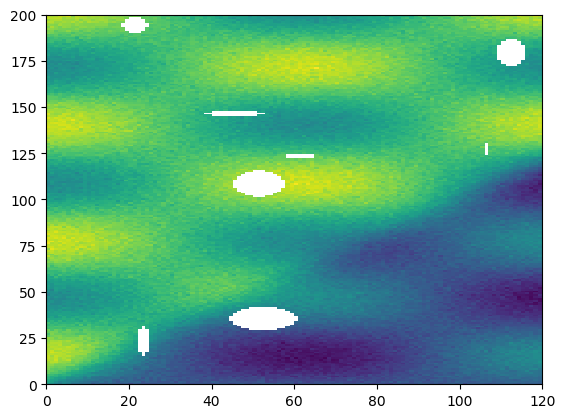

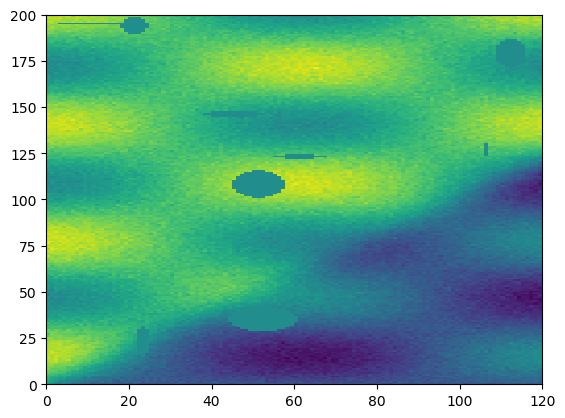

200×120 Array{Float64,2}:
 0.218735  0.0343256  -0.191273   …  -0.891053  -0.847946   -0.970491 
 0.502907  0.358108    0.0704869     -0.743091  -0.761977   -0.840981 
 0.606791  0.391246    0.325056      -0.766155  -0.580835   -0.71749  
 0.726186  0.574245    0.369344      -0.648603  -0.656046   -0.707342 
 0.819107  0.639225    0.698453      -0.642786  -0.473378   -0.65252  
 0.959583  0.907972    0.774662   …  -0.487413  -0.467832   -0.547632 
 1.27856   1.08541     1.09794       -0.282911  -0.458674   -0.524018 
 1.31328   1.30832     1.18674       -0.470059  -0.435833   -0.522744 
 1.47377   1.24595     1.17919       -0.147754  -0.0942621  -0.381302 
 1.53729   1.41452     1.30438       -0.245685  -0.347643   -0.214076 
 1.61775   1.56305     1.4014     …  -0.13713   -0.277916   -0.125948 
 1.64699   1.71849     1.55325       -0.205216  -0.0253182  -0.0201675
 1.70712   1.84101     1.87834       -0.142924  -0.106601    0.103276 
 ⋮                                ⋱                

In [4]:
-

In [5]:
@time U,S,V,cv,cva,mus=DINEOF_svds!(X,missingvalues,cvpoints;ncmax=5)

#@time mus,varest,thetaout,thetacv=DINEOF_musquare(X,U,S,V,missingvalues,cvpoints,cv)

svds!: variance and mean of the entry matrix: 0.9752964467750473 , 0.3822095334422443 ; intial variance at points to fill in: 0.1460841274541398 


┌ Warning: You should subtract a mean value from your data
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:96


Convergence for 1 eofs, relative change 0.0007614312671349143 after 6 iterations
Eof loop 1 with mean squared misfit: 0.3560964323418935 
Convergence for 2 eofs, relative change 0.0005204366429044226 after 6 iterations
Eof loop 2 with mean squared misfit: 0.4976009010321714 
Eof loop 3 with mean squared misfit: 0.18794475397331778 
Convergence for 4 eofs, relative change 0.0008049394711630537 after 10 iterations
Eof loop 4 with mean squared misfit: 0.10990662078307617 
Convergence for 5 eofs, relative change 0.0006718222479550087 after 8 iterations
Eof loop 5 with mean squared misfit: 0.09670304573677677 
Cross validation value (mean squared misfit): 0.09670304573677677 for 5 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.015286062677647533
Estimation of mean error variance of reconstuctions: -0.08141698305912923 


┌ Warning: Initial Variance has been increased for filtered matrix  by factor 1.1634450149636582
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:285


  8.851023 seconds (19.41 M allocations: 967.723 MiB, 6.17% gc time)


([-0.08280609093094538 -0.011967561355372622 … 0.03381999905400288 -0.10165558094868754; -0.08330875883394014 -0.0005198297017386944 … 0.039635378770060015 -0.07229964527110998; … ; 0.05793936697732087 0.08710121479733025 … -0.0032065930562656638 0.08645304776215126; 0.05617751751417323 0.08754912290797688 … -0.0069161333685504554 0.05900826476368676], [125.55569094460516, 78.06019708012425, 69.67554025065267, 20.717018507726415, 9.55977389156763], [0.02536306515570277 0.2072647045021714 … 0.13740139842904603 -0.18157988461684121; 0.025533202427860693 0.20483543001521273 … 0.14584985094932137 -0.17305867747124562; … ; 0.026800835852886243 0.005181699278719223 … -0.15168589733478133 -0.06383568074916202; 0.026089364585637497 0.010254260116222193 … -0.16215557125529484 -0.03980368180655511], 0.09670304573677677, [0.3560964323418935, 0.4976009010321714, 0.18794475397331778, 0.10990662078307617, 0.09670304573677677], 0.015286062677647533)

In [6]:
errm=DINEOF_errormap(U,S,V,mus,missingvalues)

200×120 Array{Float64,2}:
 0.000294444  0.000294444  0.000294444  …  0.000294444  0.000294444
 0.000215686  0.000215686  0.000215686     0.000215686  0.000215686
 0.00023847   0.00023847   0.00023847      0.00023847   0.00023847 
 0.000248242  0.000248242  0.000248242     0.000248242  0.000248242
 0.000259496  0.000259496  0.000259496     0.000259496  0.000259496
 0.000331476  0.000331476  0.000331476  …  0.000331476  0.000331476
 0.000336704  0.000336704  0.000336704     0.000336704  0.000336704
 0.000461881  0.000461881  0.000461881     0.000461881  0.000461881
 0.000434588  0.000434588  0.000434588     0.000434588  0.000434588
 0.000404246  0.000404246  0.000404246     0.000404246  0.000404246
 0.00050024   0.00050024   0.00050024   …  0.00050024   0.00050024 
 0.000498705  0.000498705  0.000498705     0.000498705  0.000498705
 0.000561865  0.000561865  0.000561865     0.000561865  0.000561865
 ⋮                                      ⋱                          
 0.000157562  0.000157

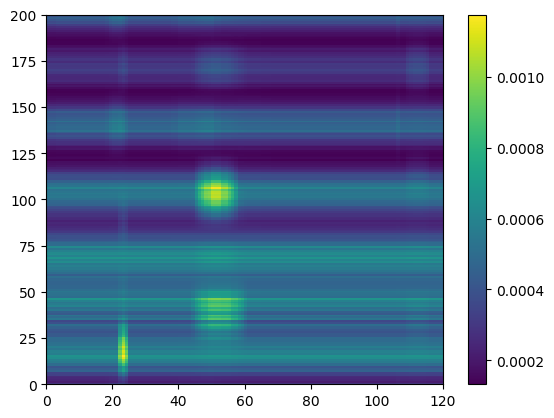

(PyObject <matplotlib.collections.PolyCollection object at 0x00000000381BB668>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000034D76DD8>)

In [7]:
pcolor(errm),colorbar()

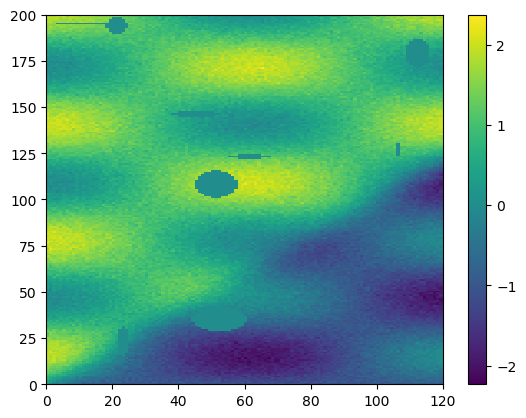

(PyObject <matplotlib.collections.PolyCollection object at 0x00000000332B2198>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000036EF1F28>)

In [8]:
pcolor(XORI),colorbar()